Exercises

The end result of this exercise should be a Jupyter notebook named model.

Using saas.csv or log data from API usage or store_item_sales

Split data (train/test) and resample by any period, except daily, and aggregate using the sum.
Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
Simple Average
Moving Average
Holt's Linear Trend Model
Based on previous year/month/etc., this is up to you.
Optional: Using store item demand

# Revised in class exercise was to use a dataset of our choice to forecast, plot, and evalute. 

# I used the Fitbit dataset see the Fitbit.ipynb

# Creating and testing explore.py and model.py

In [1]:
import acquire
import prepare
import summarize
import explore
import model


# set chart defaults
explore.set_plotting_defaults()

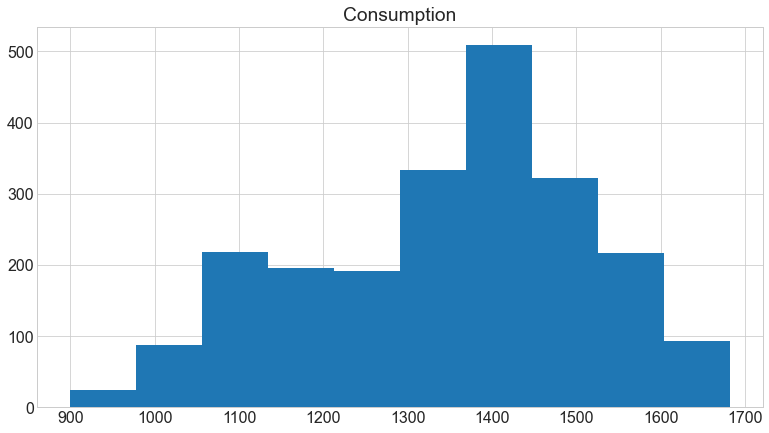

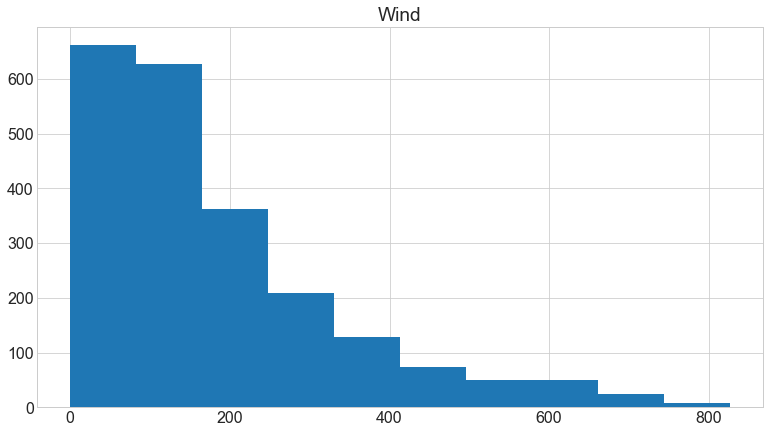

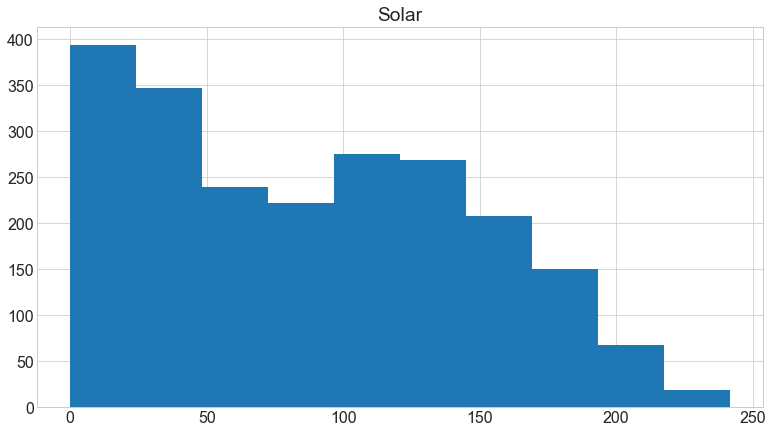

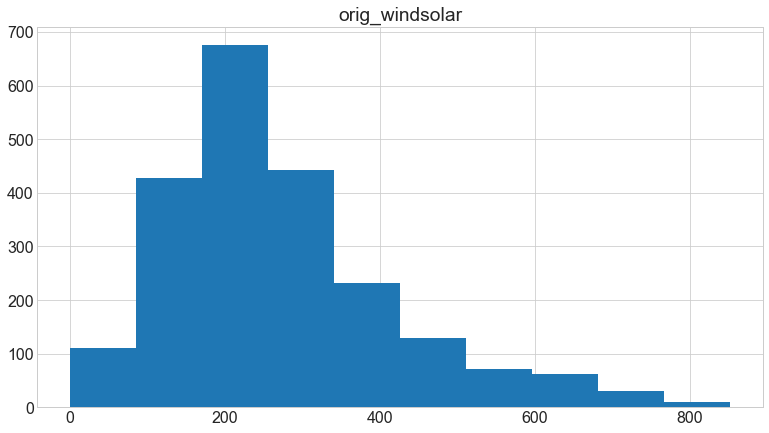

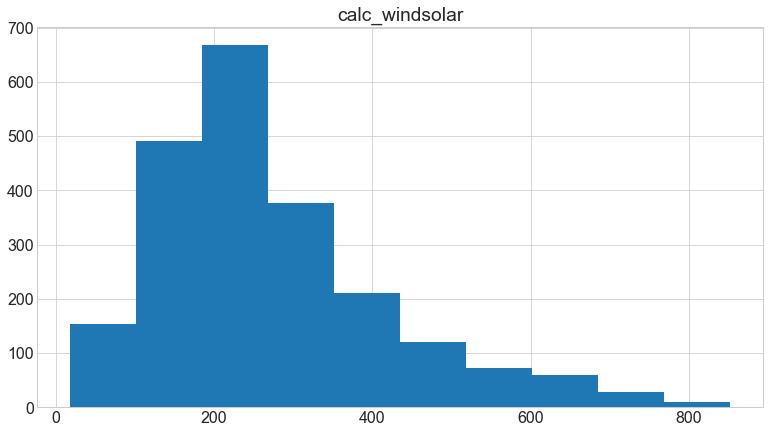

In [2]:
gdf = acquire.germany_daily()
gdf = prepare.prep_germany_data(gdf)
# changed date randge for dataset to 2012-2018 because there is no solar data prior to 2012
summarize.create_hist(gdf)

In [3]:
gdf.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052
2012-01-02,1269.581,207.327,6.574,213.901,213.901
2012-01-03,1334.745,473.468,24.679,498.147,498.147
2012-01-04,1347.136,499.804,14.681,514.485,514.485
2012-01-05,1376.658,523.851,5.071,528.922,528.922


In [4]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2012-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     2192 non-null   float64
 1   Wind            2192 non-null   float64
 2   Solar           2192 non-null   float64
 3   orig_windsolar  2192 non-null   float64
 4   calc_windsolar  2192 non-null   float64
dtypes: float64(5)
memory usage: 102.8 KB


In [5]:
check_windsolar = gdf[gdf.orig_windsolar == gdf.calc_windsolar]
check_windsolar

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-04,1347.13600,499.804,14.681,514.485,514.485
2012-01-06,1291.21500,286.265,13.160,299.425,299.425
2012-01-07,1175.68800,368.288,4.115,372.403,372.403
2012-01-12,1442.44800,446.327,18.023,464.350,464.350
2012-01-21,1242.30700,344.898,3.191,348.089,348.089
...,...,...,...,...,...
2017-12-20,1559.68569,90.880,8.799,99.679,99.679
2017-12-22,1423.23782,228.773,10.065,238.838,238.838
2017-12-27,1263.94091,394.507,16.530,411.037,411.037


**NOTE:** the original windsolar and calculated windsolar only match about 1/3 the time     
- 727 observations match
- 1465 observation DO NOT match


In [6]:
train, validate, test = explore.split_data(gdf)

In [7]:
explore.sanity_check_split(gdf, train, validate, test)

df lengths add to total: True
1st row of full df == 1st row train:             Consumption  Wind  Solar  orig_windsolar  calc_windsolar
Date                                                                
2012-01-01         True  True   True            True            True

 Is the last row of train the day before the first row of validate? And the same for validate to test?
            Consumption     Wind   Solar  orig_windsolar  calc_windsolar
Date                                                                    
2014-12-31     1183.510  145.511   3.721         149.232         149.232
2015-01-01     1111.336  325.128  17.079         342.207         342.207
            Consumption     Wind   Solar  orig_windsolar  calc_windsolar
Date                                                                    
2016-10-18     1489.622  164.324  42.428         206.752         206.752
2016-10-19     1503.565  204.847  38.170         243.017         243.017

 Is the last row of test the same as 

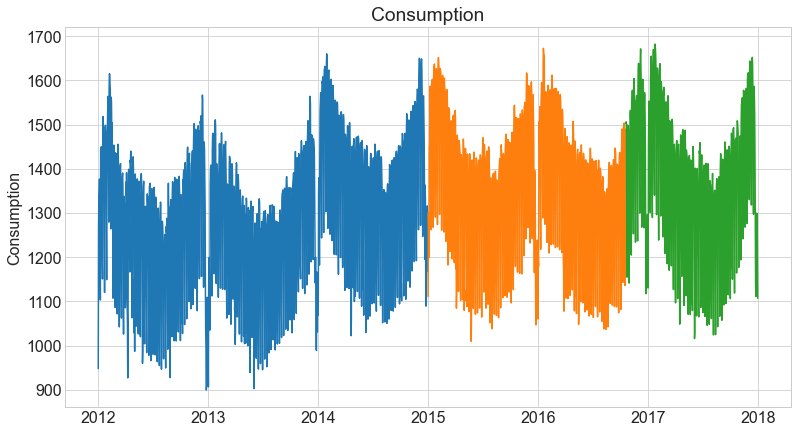

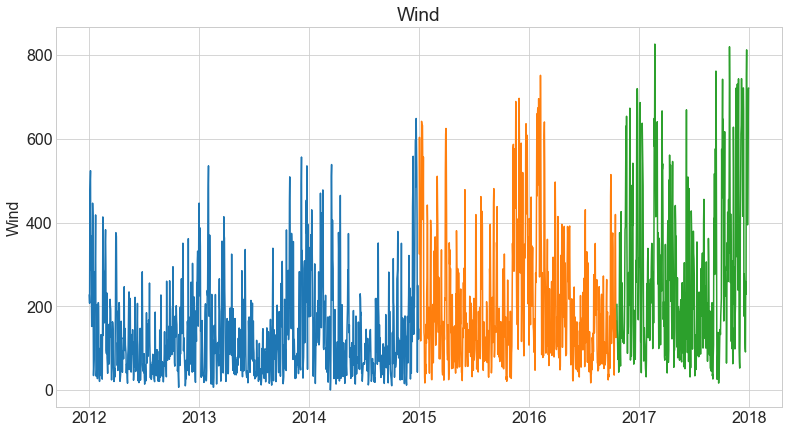

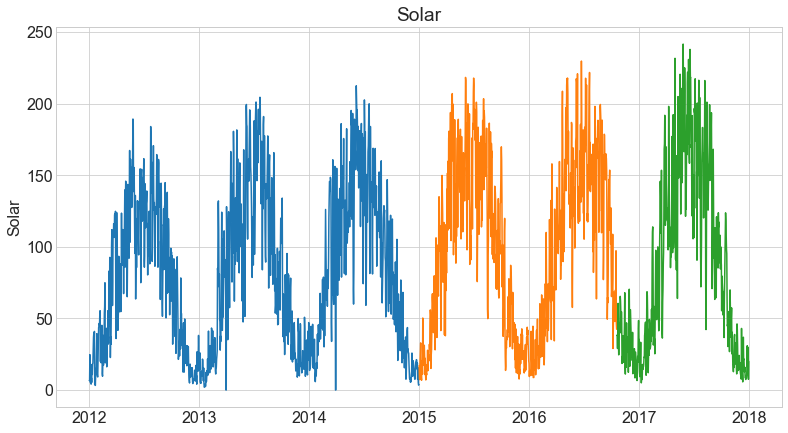

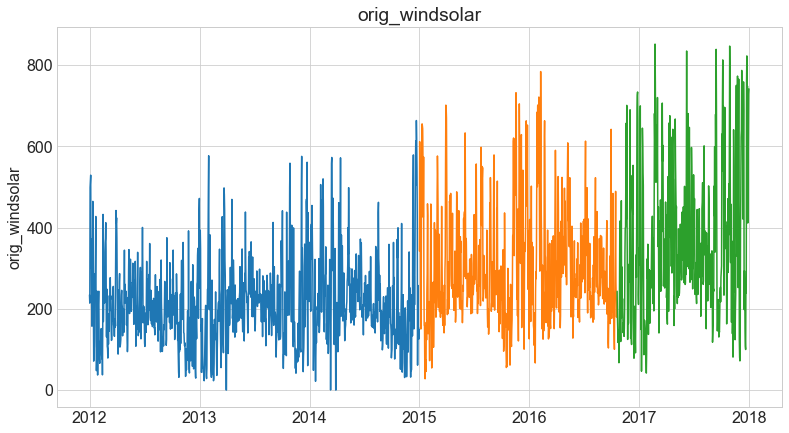

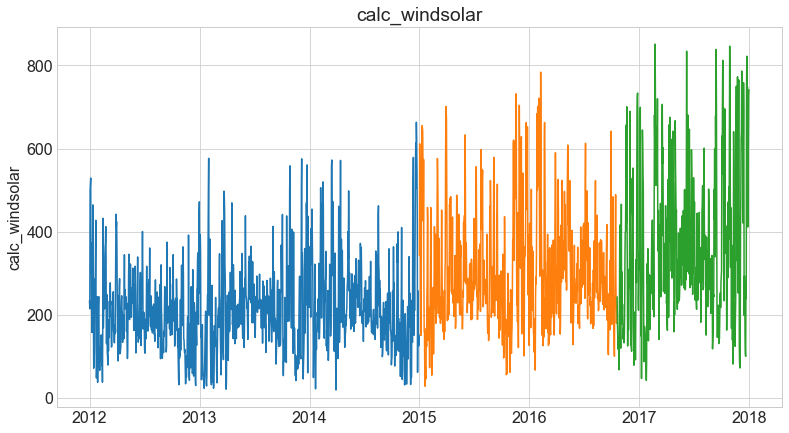

In [8]:
explore.chart_splits(train, validate, test)

### CORRECTED - changed date range for dataset

**NOTE:** the solar and original windsolar columns are all 0 in the train dataset      
- evidently they are recent addtions and so only have values in the validate and test datasets if percentage or human date split is used
- might need to try an alternative split method from sklearn if we want data from all columns in both sets
- see: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
- for now will limit exploration to just consumption instead

# EXPLORE

In [9]:
train.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052
2012-01-02,1269.581,207.327,6.574,213.901,213.901
2012-01-03,1334.745,473.468,24.679,498.147,498.147
2012-01-04,1347.136,499.804,14.681,514.485,514.485
2012-01-05,1376.658,523.851,5.071,528.922,528.922


In [10]:
train_exp = explore.train_exp(train)
train_exp.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar,month,weekday,year
Date,,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,234.052,1,Sunday,2012
2012-01-02,1269.581,207.327,6.574,213.901,213.901,1,Monday,2012
2012-01-03,1334.745,473.468,24.679,498.147,498.147,1,Tuesday,2012
2012-01-04,1347.136,499.804,14.681,514.485,514.485,1,Wednesday,2012
2012-01-05,1376.658,523.851,5.071,528.922,528.922,1,Thursday,2012


In [11]:
train_exp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2012-01-01 to 2014-12-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     1096 non-null   float64
 1   Wind            1096 non-null   float64
 2   Solar           1096 non-null   float64
 3   orig_windsolar  1096 non-null   float64
 4   calc_windsolar  1096 non-null   float64
 5   month           1096 non-null   int64  
 6   weekday         1096 non-null   object 
 7   year            1096 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 77.1+ KB


In [12]:
explore.sns_boxplot(train_exp)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# assign target variable/s
y = train.Consumption